# Regresión Lineal: Costo de un incidente de seguridad
En este ejercicio se explican los funamentos básicos de la regresión lineal aplicada a un caso de uso sencillo relacionada con la Ciberseguridad.

## Enunciado del ejercicio
El ejercicio consiste en predecir el costo de un insidente de seguridad en base al número de equipos que se han visto afectado. El lconjunto de datos es aleatoría.

# 1.- Generación del DataSet.

In [3]:
import numpy as np

X = 2 * np.random.rand(100, 1)
y = 4 + 3 * X + np.random.rand(100, 1)

print("La longitud del DataSet es: ", len(X))

La longitud del DataSet es:  100


# 2.- Visualización del conjunto del DataSet.

In [5]:
import matplotlib. pyplot as plt

%matplotlib inline

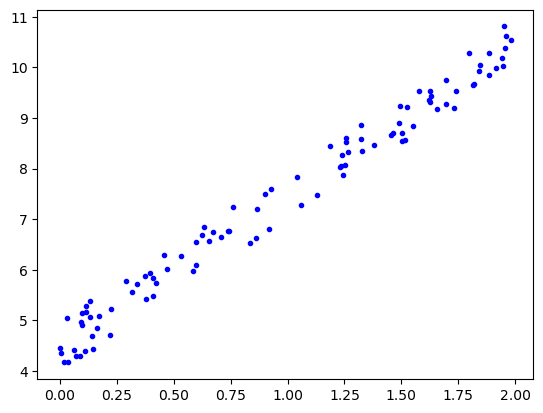

In [6]:
plt.plot(X, y, 'b.')
plt.show()

In [7]:
plt.plot(X, y, "b.")
plt.xlabel("Equipos afectados (u/1000)")
plt.ylabel("Costo del Incidente (u/1000)")

Text(0, 0.5, 'Costo del Incidente (u/1000)')

# 3.- Modificación del DataSet

In [9]:
import pandas as pd

data = {
    'No_Equipos_Afectados': X.flatten(),
    'Costo': y.flatten()
}
df = pd.DataFrame(data)
df.head(10)

,No_Equipos_Afectados,Costo
0,0.315464,5.552018
1,1.325434,8.346447
2,1.819739,9.679550
3,1.526927,9.223113
4,1.941718,10.191466
5,1.232175,8.026280
6,0.169635,5.094825
7,1.264325,8.326594
8,1.814632,9.660282
9,0.596022,6.548268


In [10]:
# Escalado del Número de equipos afectados
df['No_Equipos_Afectados'] = df['No_Equipos_Afectados'] * 1000
df['No_Equipos_Afectados'] = df['No_Equipos_Afectados'].astype('int')

# Escalado del Costo
df['Costo'] = df['Costo'] * 1000
df['Costo'] = df['Costo'].astype('int')
df.head(10)

,No_Equipos_Afectados,Costo
0,315,5552
1,1325,8346
2,1819,9679
3,1526,9223
4,1941,10191
5,1232,8026
6,169,5094
7,1264,8326
8,1814,9660
9,596,6548


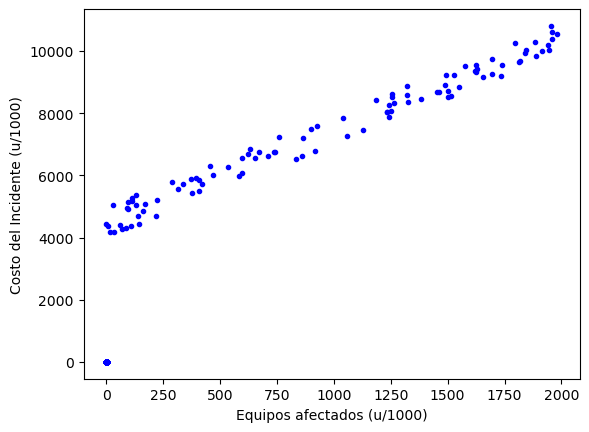

In [11]:
plt.plot(df['No_Equipos_Afectados'], df['Costo'], "b.")
plt.xlabel("Equipos afectados (u/1000)")
plt.ylabel("Costo del Incidente (u/1000)")
plt.show()

# 4.- Construcción del modelo

In [21]:
from sklearn.linear_model import LinearRegression

In [27]:
# Construccion del modelo y ajuste de la funciòn de hipòtesis
lin_reg = LinearRegression()
lin_reg.fit(df['No_Equipos_Afectados'].values.reshape(-1, 1), df['Costo'].values)

LinearRegression()

In [29]:
# Parametro Tetha 0
lin_reg.intercept_

4524.786860850605

In [31]:
# Paràmetro Tetha 1
lin_reg.coef_

array([2.95671476])

In [57]:
# Prediccion para el valor minimo y maximo para el conjunto de datos de entrenamiento
X_min_max = np.array([[df["No_Equipos_Afectados"].min()], [df["No_Equipos_Afectados"].max()]])
y_train_pred = lin_reg.predict(X_min_max)

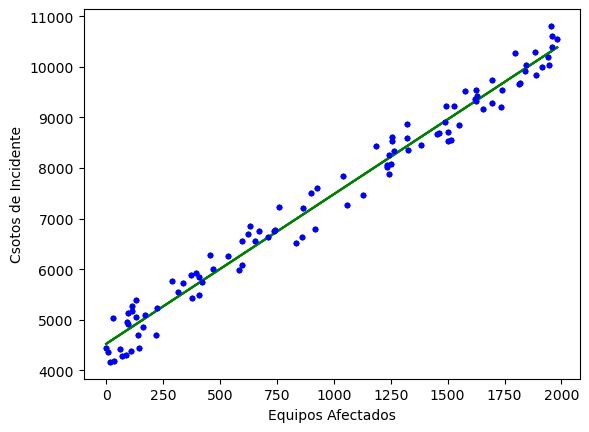

In [59]:
#Representaciòn gràfica de la funcion de hipotesis generada
plt.plot(X_min_max, y_train_pred, "g-")
plt.plot(df['No_Equipos_Afectados'], df['Costo'], "b.")
plt.xlabel("Equipos Afectados")
plt.ylabel("Csotos de Incidente")
plt.show()

# 5.- Predicciòn de nuevos ejemplos

In [72]:
x_new = np.array([[2700]]) # Nùmero de equipos afectados:
# Prediccion del costo que tendria el insidente.
Costo = lin_reg.predict(x_new) #SOLO LE ESTAMOS MANDANDO A "Y"
print("El costo del insidente seria: $", int(Costo[0]))

El costo del insidente seria: $ 12507


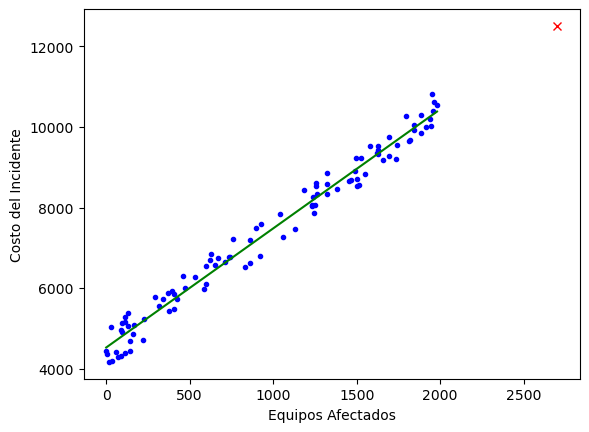

In [74]:
plt.plot(df['No_Equipos_Afectados'], df['Costo'], "b.")
plt.plot(X_min_max, y_train_pred, "g-")
plt.plot(x_new, Costo, "rx")
plt.xlabel("Equipos Afectados")
plt.ylabel("Costo del Incidente")
plt.show()